## Dataset

O primeiro passo é preparar o conjunto de dados para que possamos treinar e testar o nosso modelo.

Os nossos dados devem ser organizados da seguinte maneira:
```
└── example
    ├── images
    │   ├── img_01.png
    │   └── img_02.png
    └── labelTxt
        ├── img_01.txt
        └── img_02.txt
```
obs: Na pasta `datasets/DOTA_devkit` você encontrará um exemplo.

Em seguida devemos fazer o split das nossas imagens:

In [5]:
from datasets.DOTA_devkit.ImgSplit import splitbase

split = splitbase('datasets/DOTA_devkit/example', 'datasets/DOTA_devkit/examplesplit',
                  subsize=1024, gap=128, ext='.jpg')

# rate: resize image before cut
split.splitdata(rate=1.0)

## Treinando um modelo

In [1]:
# Outros parâmetros podem ser consultados no arquivo main.py
!python main.py \
    --data_dir datasets/DOTA_devkit/examplesplit \
    --num_epoch 5 \
    --batch_size 2 \
    --dataset dota \
    --phase train

Setting up data...
Starting training...
----------
Epoch: 1/5 
/home/guilherme/.virtualenvs/bbaenv/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
train loss: 21.761043564478555
/home/guilherme/.virtualenvs/bbaenv/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github

## Testando o modelo

Para testar o modelo podemos usar a flag --phase test ou --phase eval. A diferença é que o teste plota os resultados na tela e o eval salva os resultados em um arquivo.

### Resultados

Após rodar o modelo com `--phase eval` os resultados serão salvos em duas pastas:
 - results: nessa pasta são salvos os resultados obtidos em cada imagem individualmente.
 - merge: nessa pasta os resultados salvos já foram mergeados e portanto estão na resolução da imagem original.

In [9]:
# Outros parâmetros podem ser consultados no arquivo main.py
!python main.py \
    --data_dir datasets/DOTA_devkit/examplesplit \
    --batch_size 1 \
    --dataset dota \
    --resume model_last.pth \
    --phase eval

loaded weights from weights/model_last.pth, epoch 5
/home/guilherme/.virtualenvs/bbaenv/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/home/guilherme/.virtualenvs/bbaenv/lib/python3.7/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.

## Visualizando resultados

Para visualizarmos os resultados devemos:
 - Converter os resultados da pasta merge para um formato que o DOTA DevKit entende. Para isso usamos o método `Task2groundtruth_poly`.
 - Carregamos o dado processado e exibimos com o método `showAnns`.

isarralike: False
imgids: ['P1234']
filename: restored/images/P1234.jpg


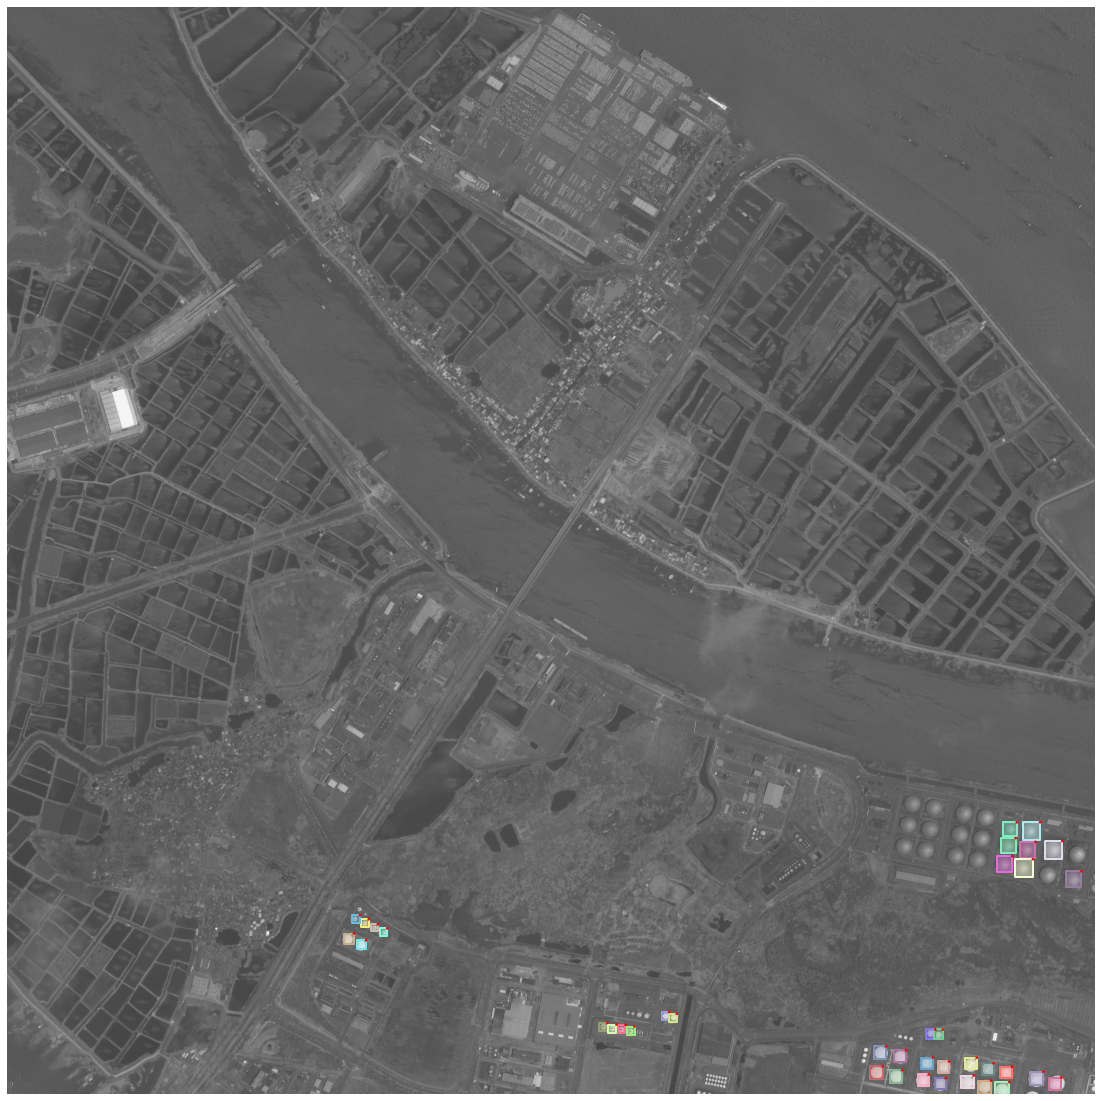

In [20]:
# import matplotlib.pyplot as plt
import os
import glob
import pylab
import shutil
import dota_utils as util
from DOTA import DOTA
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

util.Task2groundtruth_poly(
    'merge',
    'restored/labelTxt'
)

if not os.path.exists('restored/images'):
    os.makedirs('restored/images')

for file in glob.glob('datasets/DOTA_devkit/example/images/*'):
    shutil.copy(file, './restored/images')

restored = DOTA('restored')
imgids = restored.getImgIds()
anns = restored.loadAnns(imgId=imgids[0])

restored.showAnns(anns, imgids[0], 2)
